# US Education Data

This dataset is from the US Census Bureau and the National Center for Education Statistics.

I found it on Kaggle https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home

The dataset includes enrollment, financial information, and achievement scores for US states and territories from 1992 to 2017.

My goal is to answer the following questions:

Which states perform the best and worst in terms of math and reading test scores?

Do the states that performed best and worst receive greater or lesser amounts of funding compared to other states?

How did the best and worst states performance in enrollment, finances, and test scores change over time?

Future research questions to ask:

Can this information be used to predict future scores?

Do test scores from this dataset actually correlate to any variables given?

Other questions: 

What kind of visualizations are available to map out achievement scores across the country? What are some good visualization tools to show time (years 1992-2017), all states and territories (50+), and scores?

__#1 Which states perform the best and worst in terms of math and reading test scores?__

To answer this, we need to define best and worst performance. To start let's pull up metrics from 2015 and look at the test results.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [136]:
df = pd.read_csv('states_all.csv')
df_2015 = df[df['YEAR'] == 2015]

In [12]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


In [121]:
df.groupby('YEAR').describe()
df.groupby('STATE').describe()
df.YEAR.value_counts()
df.STATE.value_counts()

DISTRICT_OF_COLUMBIA                        29
VIRGINIA                                    28
INDIANA                                     26
ARIZONA                                     26
OREGON                                      26
WASHINGTON                                  26
WEST_VIRGINIA                               26
IDAHO                                       26
ILLINOIS                                    26
CALIFORNIA                                  26
NEW_HAMPSHIRE                               26
NEW_JERSEY                                  26
ALASKA                                      26
IOWA                                        26
NEW_YORK                                    26
KANSAS                                      26
PENNSYLVANIA                                26
VERMONT                                     26
COLORADO                                    26
ARKANSAS                                    26
MINNESOTA                                   26
MISSOURI     

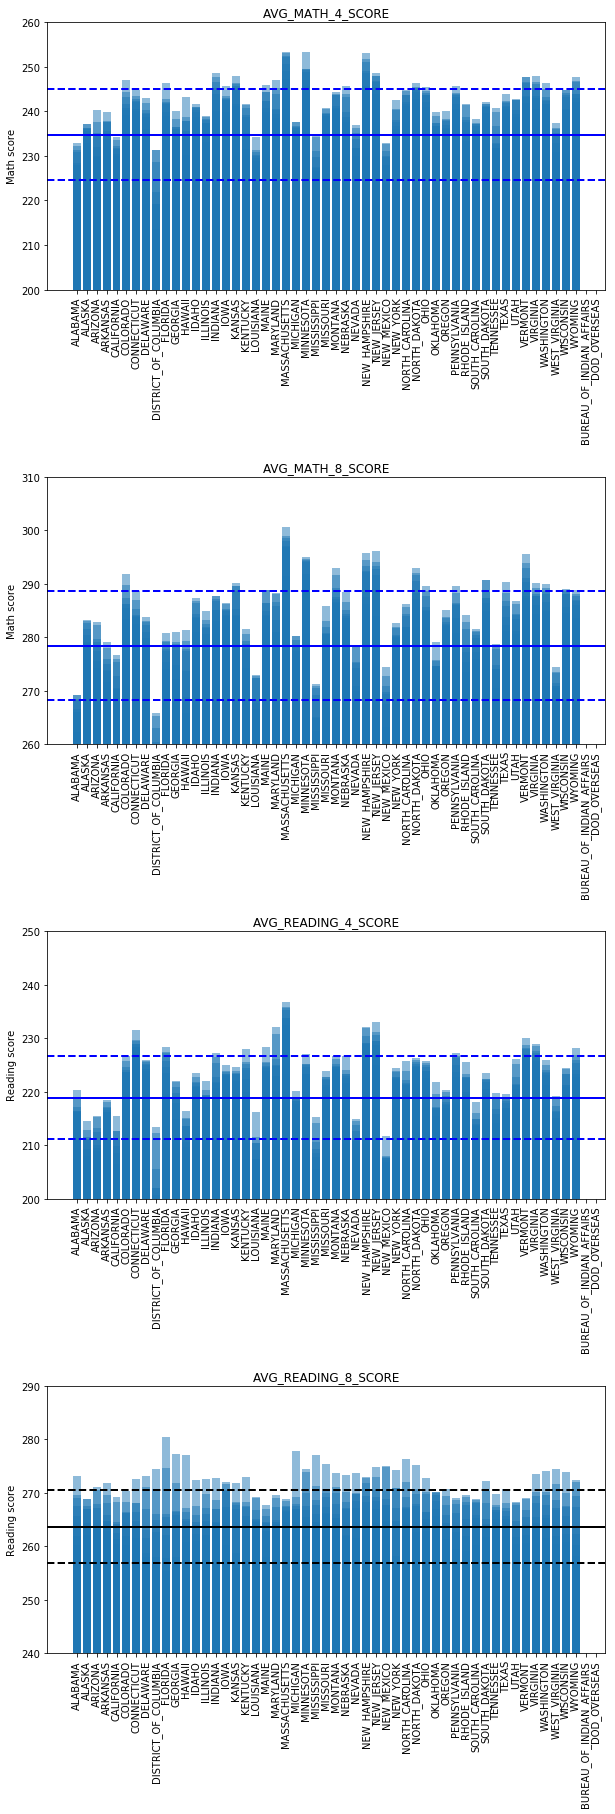

In [124]:
plt.figure(figsize=(10,30))

plt.subplot(4,1,1)
plt.bar(df['STATE'].tolist(), df['AVG_MATH_4_SCORE'], alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylim(200,260)
plt.title('AVG_MATH_4_SCORE')
plt.axhline(df['AVG_MATH_4_SCORE'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axhline(df['AVG_MATH_4_SCORE'].mean() + df['AVG_MATH_4_SCORE'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axhline(df['AVG_MATH_4_SCORE'].mean() - df['AVG_MATH_4_SCORE'].std(), color='b', linestyle='dashed', linewidth=2)
plt.ylabel('Math score')

plt.subplot(4,1,2)
plt.bar(df['STATE'].tolist(), df['AVG_MATH_8_SCORE'], alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylim(260,310)
plt.title('AVG_MATH_8_SCORE')
plt.axhline(df['AVG_MATH_8_SCORE'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axhline(df['AVG_MATH_8_SCORE'].mean() + df['AVG_MATH_8_SCORE'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axhline(df['AVG_MATH_8_SCORE'].mean() - df['AVG_MATH_8_SCORE'].std(), color='b', linestyle='dashed', linewidth=2)
plt.ylabel('Math score')

plt.subplot(4,1,3)
plt.bar(df['STATE'].tolist(), df['AVG_READING_4_SCORE'], alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylim(200,250)
plt.title('AVG_READING_4_SCORE')
plt.axhline(df['AVG_READING_4_SCORE'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axhline(df['AVG_READING_4_SCORE'].mean() + df['AVG_READING_4_SCORE'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axhline(df['AVG_READING_4_SCORE'].mean() - df['AVG_READING_4_SCORE'].std(), color='b', linestyle='dashed', linewidth=2)
plt.ylabel('Reading score')

plt.subplot(4,1,4)
plt.bar(df['STATE'].tolist(), df['AVG_READING_8_SCORE'], alpha=0.5)
plt.xticks(rotation='vertical')
plt.title('AVG_READING_8_SCORE')
plt.axhline(df['AVG_READING_8_SCORE'].mean(), color='black', linestyle='solid', linewidth=2)
plt.axhline(df['AVG_READING_8_SCORE'].mean() + df['AVG_READING_8_SCORE'].std(), color='black', linestyle='dashed', linewidth=2)
plt.axhline(df['AVG_READING_8_SCORE'].mean() - df['AVG_READING_8_SCORE'].std(), color='black', linestyle='dashed', linewidth=2)
plt.ylim(240,290)
plt.ylabel('Reading score')

plt.subplots_adjust(hspace=0.7)

plt.show()

Okay that seems like a good start. We can visually decipher which states are on the extreme high or low side for each of the 4 test. Let's see if we can get some lists of these states.


In [164]:
states_best_math_4 = df[df['AVG_MATH_4_SCORE'] > df['AVG_MATH_4_SCORE'].mean() + df['AVG_MATH_4_SCORE'].std()]
states_best_math_8 = df[df['AVG_MATH_8_SCORE'] > df['AVG_MATH_8_SCORE'].mean() + df['AVG_MATH_8_SCORE'].std()]
states_best_reading_4 = df[df['AVG_READING_4_SCORE'] > df['AVG_READING_4_SCORE'].mean() + df['AVG_READING_4_SCORE'].std()]
states_best_reading_8 = df[df['AVG_READING_8_SCORE'] > df['AVG_READING_8_SCORE'].mean() + df['AVG_READING_8_SCORE'].std()]

states_worst_math_4 = df[df['AVG_MATH_4_SCORE'] < df['AVG_MATH_4_SCORE'].mean() - df['AVG_MATH_4_SCORE'].std()]
states_worst_math_8 = df[df['AVG_MATH_8_SCORE'] < df['AVG_MATH_8_SCORE'].mean() - df['AVG_MATH_8_SCORE'].std()]
states_worst_reading_4 = df[df['AVG_READING_4_SCORE'] < df['AVG_READING_4_SCORE'].mean() - df['AVG_READING_4_SCORE'].std()]
states_worst_reading_8 = df[df['AVG_READING_8_SCORE'] < df['AVG_READING_8_SCORE'].mean() - df['AVG_READING_8_SCORE'].std()]

list_best_states = states_best_math_4['STATE'].tolist() + states_best_math_8['STATE'].tolist() + states_best_reading_4['STATE'].tolist() + states_best_reading_8['STATE'].tolist() 
list_worst_states = states_worst_math_4['STATE'].tolist() + states_worst_math_8['STATE'].tolist() + states_worst_reading_4['STATE'].tolist() + states_worst_reading_8['STATE'].tolist() 
list_best_states.sort()
list_worst_states.sort()
def make_dict(list_states):
    d = {}
    for state in list_states:
        d[state] = d.get(state, 0) +1
    return d

#d_worst = {}
#for state in list_worst_states:
#    d_worst[state] = d_worst.get(state, 0) +1
#d_worst
print(make_dict(list_best_states), make_dict(list_worst_states))


{'ALABAMA': 1, 'ARIZONA': 2, 'ARKANSAS': 1, 'COLORADO': 4, 'CONNECTICUT': 11, 'DELAWARE': 2, 'DISTRICT_OF_COLUMBIA': 2, 'FLORIDA': 6, 'GEORGIA': 2, 'HAWAII': 1, 'IDAHO': 1, 'ILLINOIS': 1, 'INDIANA': 6, 'IOWA': 4, 'KANSAS': 10, 'KENTUCKY': 2, 'MAINE': 4, 'MARYLAND': 4, 'MASSACHUSETTS': 23, 'MICHIGAN': 1, 'MINNESOTA': 18, 'MISSISSIPPI': 2, 'MISSOURI': 1, 'MONTANA': 6, 'NEBRASKA': 2, 'NEVADA': 1, 'NEW_HAMPSHIRE': 23, 'NEW_JERSEY': 21, 'NEW_MEXICO': 2, 'NEW_YORK': 3, 'NORTH_CAROLINA': 2, 'NORTH_DAKOTA': 10, 'OHIO': 4, 'OREGON': 1, 'PENNSYLVANIA': 4, 'SOUTH_DAKOTA': 3, 'TEXAS': 2, 'VERMONT': 16, 'VIRGINIA': 11, 'WASHINGTON': 5, 'WEST_VIRGINIA': 2, 'WISCONSIN': 4, 'WYOMING': 8} {'ALABAMA': 16, 'ALASKA': 6, 'ARIZONA': 13, 'ARKANSAS': 10, 'CALIFORNIA': 16, 'COLORADO': 2, 'CONNECTICUT': 1, 'DELAWARE': 8, 'DISTRICT_OF_COLUMBIA': 37, 'FLORIDA': 10, 'GEORGIA': 11, 'HAWAII': 16, 'IDAHO': 4, 'ILLINOIS': 2, 'INDIANA': 2, 'IOWA': 1, 'KANSAS': 4, 'KENTUCKY': 7, 'LOUISIANA': 19, 'MAINE': 3, 'MARYLAND': 

Okay great! Now let's write a function that gives us a list of the states that were in the best or worst state lists for 3 out of the 4 metrics (4th and 8th grade math and 4th and 8th grade reading tests). These will be our best of best and worst of worst, so now we have a defination for best and worst performers for 2015.

In [139]:
def extreme_performing_state(list_of_states):
    extreme_performing_state_list = []
    extreme_performing_state_list_1 = []
    for state in list_of_states:
        if list_of_states.count(state) > 10:
            extreme_performing_state_list.append(state)
    for state in extreme_performing_state_list:
        if state not in extreme_performing_state_list_1:
            extreme_performing_state_list_1.append(state)
    return extreme_performing_state_list_1
top_performers = ', '.join(extreme_performing_state(list_best_states))
bottom_performers = ', '.join(extreme_performing_state(list_worst_states))
print('Top performers: {}'.format(top_performers))
print('Top performers: {}'.format(bottom_performers))

Top performers: CONNECTICUT, MASSACHUSETTS, MINNESOTA, NEW_HAMPSHIRE, NEW_JERSEY, VERMONT, VIRGINIA
Top performers: ALABAMA, ARIZONA, CALIFORNIA, DISTRICT_OF_COLUMBIA, GEORGIA, HAWAII, LOUISIANA, MISSISSIPPI, NEVADA, NEW_MEXICO


__#2 Did the best and worst performing states receive the more or less funding compared to other states?__
To answer this we are going to look at total expenditure per enrolled student in 2015 for each state and see how these values compare to the average dollar per student amount.

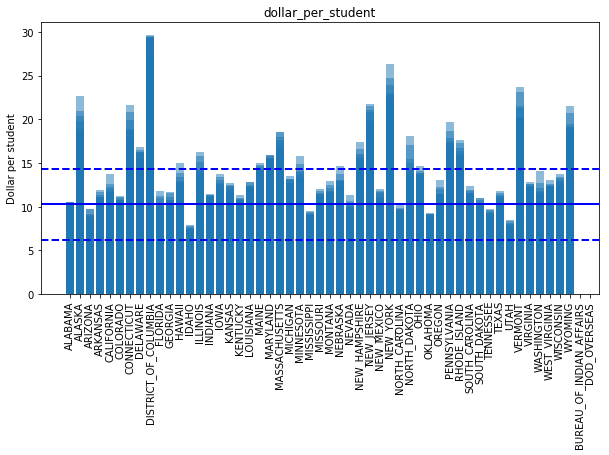

In [140]:
df['dollar_per_student'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']

plt.figure(figsize=(10,5))

plt.bar(df['STATE'].tolist(), df['dollar_per_student'], alpha=0.5)
plt.xticks(rotation='vertical')
plt.title('dollar_per_student')
plt.axhline(df['dollar_per_student'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axhline(df['dollar_per_student'].mean() + df['dollar_per_student'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axhline(df['dollar_per_student'].mean() - df['dollar_per_student'].std(), color='b', linestyle='dashed', linewidth=2)
plt.ylabel('Dollar per student')

plt.show()

In [185]:
states_least_dolperstu = df[df['dollar_per_student'] < df['dollar_per_student'].mean() - df['dollar_per_student'].std()]
states_most_dolperstu = df[df['dollar_per_student'] > df['dollar_per_student'].mean() + df['dollar_per_student'].std()]
states_least_dolperstu = states_least_dolperstu['STATE'].tolist()
states_most_dolperstu = states_most_dolperstu['STATE'].tolist()

states_least_dolperstu.sort()
states_most_dolperstu.sort()
states_least_dolperstu
states_most_dolperstu

def extreme_performing_state(list_of_states):
    extreme_performing_state_list = []
    extreme_performing_state_list_1 = []
    for state in list_of_states:
        if list_of_states.count(state) > 9:
            extreme_performing_state_list.append(state)
    for state in extreme_performing_state_list:
        if state not in extreme_performing_state_list_1:
            extreme_performing_state_list_1.append(state)
    return extreme_performing_state_list_1

print(extreme_performing_state(states_most_dolperstu), '\n', extreme_performing_state(states_least_dolperstu))


['ALASKA', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA', 'MASSACHUSETTS', 'NEW_JERSEY', 'NEW_YORK', 'PENNSYLVANIA', 'VERMONT', 'WYOMING'] 
 ['MISSISSIPPI', 'UTAH']


In [186]:

print('Most funded states: {}'.format(extreme_performing_state(states_most_dolperstu)))
print('Least funded states: {}'.format(extreme_performing_state(states_least_dolperstu)))



Most funded states: ['ALASKA', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA', 'MASSACHUSETTS', 'NEW_JERSEY', 'NEW_YORK', 'PENNSYLVANIA', 'VERMONT', 'WYOMING']
Least funded states: ['MISSISSIPPI', 'UTAH']


Now to see if there is an correlation between top/bottom performing states and most/least funded states:

In [215]:
most_funded_states = extreme_performing_state(states_most_dolperstu)
least_funded_states = extreme_performing_state(states_least_dolperstu)
best_scores_states = extreme_performing_state(list_best_states)
worst_scores_states = extreme_performing_state(list_worst_states)

In [222]:
def check_both_perform_fund(list_states, funding_list):
    both_top_perfom_funding = []
    for state in funding_list:
        if state not in both_top_perfom_funding and state in list_states:
            both_top_perfom_funding.append(state)
    return both_top_perfom_funding         
        
print('Most funded and best scores states: {}'.format(check_both_perform_fund(best_scores_states, most_funded_states)))
      
print('Least funded and worst scores states: {}'.format(check_both_perform_fund(worst_scores_states, least_funded_states)))
      
      
      

Most funded and best scores states: ['CONNECTICUT', 'MASSACHUSETTS', 'NEW_JERSEY', 'VERMONT']
Least funded and worst scores states: ['MISSISSIPPI']


In [76]:
for state in states_least_dolperstu:
    if state in worst_performing_state:
        print(state)

Alright we checked to see if states with most and least funding per student were also extreme performers. For top performers we can see Connecticut, Massachusetts, New Jersey, and Vermont also had a high amount of funding per student. However there was only one bottom performers that had unusally low amounts of funding. 

It does seem as though there is a correlation between funding and test scores but it does not seem super big. I think we could look at a plot of average test score for the 4 tests and funding per student for each state and determine if there was a correlation that way. I think more investigation is required, but maybe that should be for another time. Other things to consider, how are total expenditure and total revenue related? If there is not much correlation between total expenditure and test scores, is there a correlation between test scores and some other revenue or expenditure? 

In [109]:
df['dollar_per_student'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']


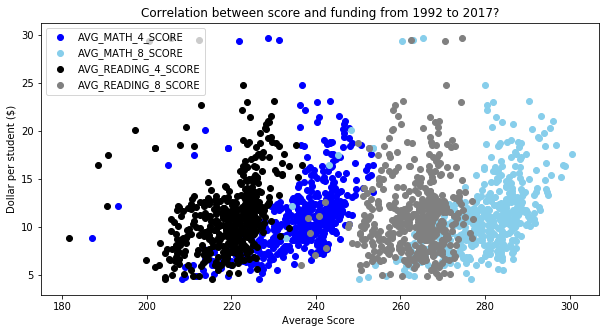

In [111]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['AVG_MATH_4_SCORE'],y=df['dollar_per_student'], color='blue')
plt.scatter(x=df['AVG_MATH_8_SCORE'],y=df['dollar_per_student'], color='skyblue')
plt.scatter(x=df['AVG_READING_4_SCORE'],y=df['dollar_per_student'], color='black')
plt.scatter(x=df['AVG_READING_8_SCORE'],y=df['dollar_per_student'], color='grey')
plt.xlabel('Average Score ')
plt.ylabel('Dollar per student ($)')
plt.title('Correlation between score and funding from 1992 to 2017?')
plt.legend(('AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'), loc='upper left')
plt.show()

I couldn't resist just checking what the total expenditure compared to test scores looked like. In general I do see a small trend, especially in the math scores for 4th and 8th grade. Reading scores for 4th and 8th grade are a bit all over the place.

For now let's look at some historical information in our dataset to determine...

__#3 How did the best and worst performers enrollment, finances, and test scores change over time?__

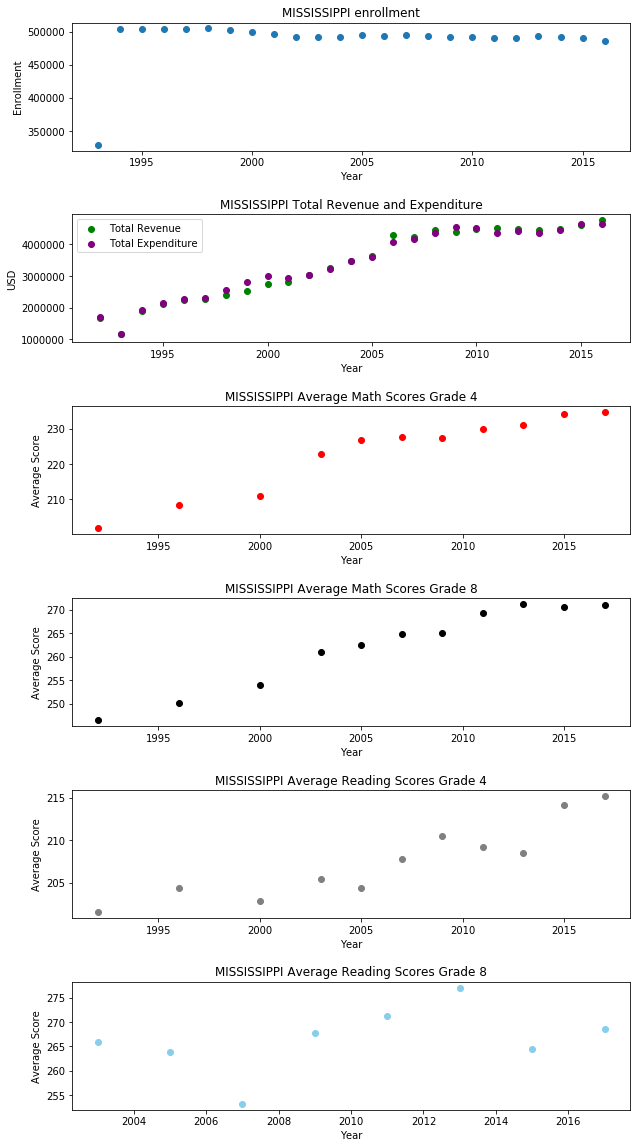

In [223]:
MISSISSIPPI = df[df['STATE']=='MISSISSIPPI']
plt.figure(figsize=(10,20))

plt.subplot(6, 1, 1)
plt.scatter(x=MISSISSIPPI['YEAR'], y=MISSISSIPPI['ENROLL'])
plt.title('MISSISSIPPI enrollment')
plt.xlabel('Year')
plt.ylabel('Enrollment')

plt.subplot(6, 1, 2)
plt.scatter(
    x=MISSISSIPPI['YEAR'],
    y=MISSISSIPPI['TOTAL_REVENUE'],
    color='green'
)

plt.scatter(
    x=MISSISSIPPI['YEAR'],
    y=MISSISSIPPI['TOTAL_EXPENDITURE'],
    color='purple'
)

plt.legend(('Total Revenue', 'Total Expenditure'), loc='upper left')
plt.title('MISSISSIPPI Total Revenue and Expenditure')
plt.xlabel('Year')
plt.ylabel('USD')

plt.subplot(6, 1, 3)
plt.scatter(
    x=MISSISSIPPI['YEAR'], 
    y=MISSISSIPPI['AVG_MATH_4_SCORE'], 
    color='red'
)
plt.title('MISSISSIPPI Average Math Scores Grade 4')
plt.xlabel('Year')
plt.ylabel('Average Score')

plt.subplot(6, 1, 4)
plt.scatter(x=MISSISSIPPI['YEAR'], 
            y=MISSISSIPPI['AVG_MATH_8_SCORE'], 
            color='black'
)
plt.title('MISSISSIPPI Average Math Scores Grade 8')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.subplot(6, 1, 5)
plt.scatter(x=MISSISSIPPI['YEAR'], 
            y=MISSISSIPPI['AVG_READING_4_SCORE'], 
            color='grey'
)
plt.title('MISSISSIPPI Average Reading Scores Grade 4')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.subplot(6, 1, 6)
plt.scatter(x=MISSISSIPPI['YEAR'],
            y=MISSISSIPPI['AVG_READING_8_SCORE'],
            color='skyblue'
)
plt.title('MISSISSIPPI Average Reading Scores Grade 8')
plt.xlabel('Year')
plt.ylabel('Average Score')

plt.subplots_adjust(hspace=0.5)
plt.show()

For Mississippi, financial amounts increases with time and most scores have a mostly upward trend, while enrollment is mostly flat.

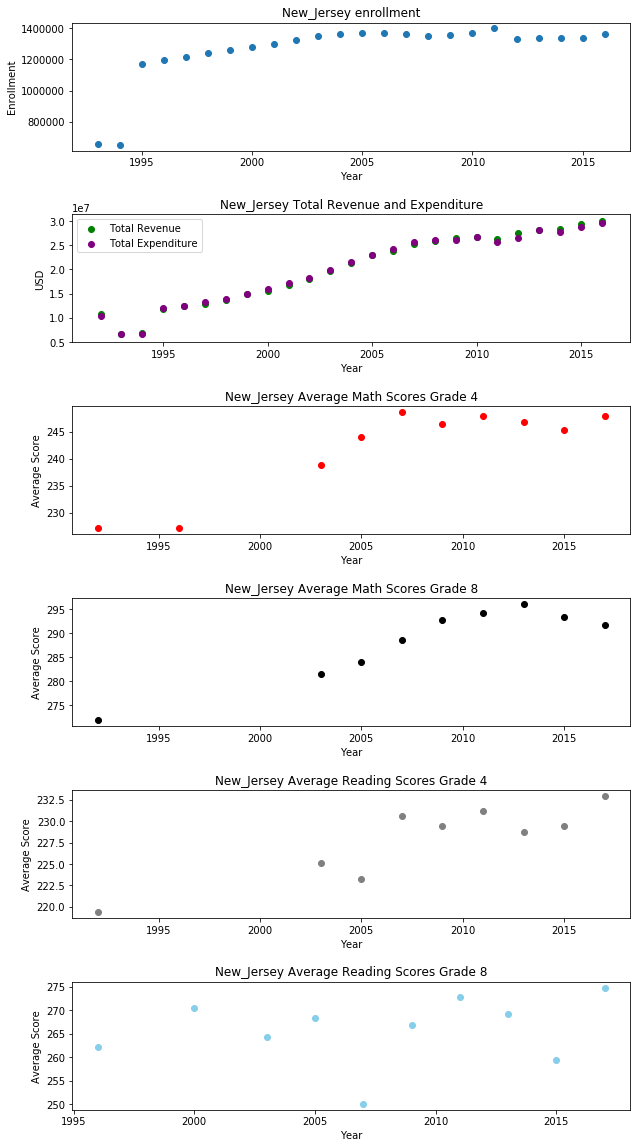

In [83]:
NEW_JERSEY = df[df['STATE']=='NEW_JERSEY']
plt.figure(figsize=(10,20))

plt.subplot(6, 1, 1)
plt.scatter(x=NEW_JERSEY['YEAR'], y=NEW_JERSEY['ENROLL'])
plt.title('New_Jersey enrollment')
plt.xlabel('Year')
plt.ylabel('Enrollment')

plt.subplot(6, 1, 2)
plt.scatter(
    x=NEW_JERSEY['YEAR'],
    y=NEW_JERSEY['TOTAL_REVENUE'],
    color='green'
)

plt.scatter(
    x=NEW_JERSEY['YEAR'],
    y=NEW_JERSEY['TOTAL_EXPENDITURE'],
    color='purple'
)

plt.legend(('Total Revenue', 'Total Expenditure'), loc='upper left')
plt.title('New_Jersey Total Revenue and Expenditure')
plt.xlabel('Year')
plt.ylabel('USD')

plt.subplot(6, 1, 3)
plt.scatter(
    x=NEW_JERSEY['YEAR'], 
    y=NEW_JERSEY['AVG_MATH_4_SCORE'], 
    color='red'
)
plt.title('New_Jersey Average Math Scores Grade 4')
plt.xlabel('Year')
plt.ylabel('Average Score')

plt.subplot(6, 1, 4)
plt.scatter(x=NEW_JERSEY['YEAR'], 
            y=NEW_JERSEY['AVG_MATH_8_SCORE'], 
            color='black'
)
plt.title('New_Jersey Average Math Scores Grade 8')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.subplot(6, 1, 5)
plt.scatter(x=NEW_JERSEY['YEAR'], 
            y=NEW_JERSEY['AVG_READING_4_SCORE'], 
            color='grey'
)
plt.title('New_Jersey Average Reading Scores Grade 4')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.subplot(6, 1, 6)
plt.scatter(x=NEW_JERSEY['YEAR'],
            y=NEW_JERSEY['AVG_READING_8_SCORE'],
            color='skyblue'
)
plt.title('New_Jersey Average Reading Scores Grade 8')
plt.xlabel('Year')
plt.ylabel('Average Score')

plt.subplots_adjust(hspace=0.5)
plt.show()

For New Jersey like most other states we showed, enrollment and and funding increase with time as do test scores. For most of the states, 8th grade reading scores do not have any sort of trend with time. Maybe there is something inconsistent with the testing reading for 8th graders.

For the states examined in this dataset, we can see that overall scores are improving from 1992 to 2017 and funding levels correlate with enrollment.

While the study has aimed to determine top performing states in 4th and 8th Grade Math and Reading tests it is important to kind in mind that these test scores are only one measure of success. There are plenty of other ways to see how students in different states are performing: college admittance, income as adult, and so on. 

__Lastly, we have New Jersey as the top performer in 2015 and Mississippi as a bottom performer in 2015. Are they actually different?__

In [224]:
from scipy.stats import ttest_ind
tvalue, pvalue = (ttest_ind(NEW_JERSEY['AVG_MATH_4_SCORE'][~np.isnan(NEW_JERSEY['AVG_MATH_4_SCORE'])].tolist()
, MISSISSIPPI['AVG_MATH_4_SCORE'][~np.isnan(MISSISSIPPI['AVG_MATH_4_SCORE'])].tolist()
, equal_var=False))
if pvalue < 0.05:
    print('New Jersey and Mississippi have significant differences in 4th grade math scores.')
else:
    print('New Jersey and Mississippi have scores that are not too different.')



New Jersey and Mississippi have significant differences in 4th grade math scores.


In [226]:
tvalue, pvalue = (ttest_ind(NEW_JERSEY['AVG_MATH_8_SCORE'][~np.isnan(NEW_JERSEY['AVG_MATH_8_SCORE'])].tolist()
, MISSISSIPPI['AVG_MATH_8_SCORE'][~np.isnan(MISSISSIPPI['AVG_MATH_8_SCORE'])].tolist()
, equal_var=False))
if pvalue < 0.05:
    print('New Jersey and Mississippi have significant differences in 8th grade math scores.')
else:
    print('New Jersey and Mississippi have scores that are not too different.')


New Jersey and Mississippi have significant differences in 8th grade math scores.


In [227]:
tvalue, pvalue = (ttest_ind(NEW_JERSEY['AVG_READING_4_SCORE'][~np.isnan(NEW_JERSEY['AVG_READING_4_SCORE'])].tolist()
, MISSISSIPPI['AVG_READING_4_SCORE'][~np.isnan(MISSISSIPPI['AVG_READING_4_SCORE'])].tolist()
, equal_var=False))
if pvalue < 0.05:
    print('New Jersey and Mississippi have significant differences in 4th grade reading scores.')
else:
    print('New Jersey and Mississippi have scores that are not too different.')


New Jersey and Mississippi have significant differences in 4th grade reading scores.


In [228]:
tvalue, pvalue = (ttest_ind(NEW_JERSEY['AVG_READING_8_SCORE'][~np.isnan(NEW_JERSEY['AVG_READING_8_SCORE'])].tolist()
, MISSISSIPPI['AVG_READING_8_SCORE'][~np.isnan(MISSISSIPPI['AVG_READING_8_SCORE'])].tolist()
, equal_var=False))
if pvalue < 0.05:
    print('New Jersey and Mississippi have significant differences in 8th grade reading scores.')
else:
    print('New Jersey and Mississippi have scores that are not too different.')


New Jersey and Mississippi have scores that are not too different.
